In [1]:
import f3dasm
import numpy as np
import matplotlib.pyplot as plt
import scienceplots

plt.style.use('science')


2022-12-14 15:33:26.332575: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-14 15:33:26.487940: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-12-14 15:33:27.240476: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.1/lib64:/usr/local/cuda-11.1/lib64
2022-12-14 15:33:27.240556: W ten

In [2]:
seed = np.random.randint(low=0, high=1e5)
print(f"My seed is: {seed}")

My seed is: 49818


In [3]:
lower_bound = -1.0
upper_bound = 1.0
noise = 0.05
dimensionality = 20
number_of_samples = 30
iterations = 1000
realizations = 10
parallelization = True

function_class = f3dasm.functions.Rastrigin
optimizer_class = f3dasm.optimization.CMAES
sampler_class = f3dasm.sampling.LatinHypercube

bounds = np.tile([lower_bound,upper_bound], (dimensionality,1))
design = f3dasm.make_nd_continuous_design(bounds=bounds, dimensionality=dimensionality)

function = function_class(dimensionality=dimensionality, noise=noise, scale_bounds=design.get_bounds(), seed=seed)
data = f3dasm.Data(design)
optimizer = optimizer_class(data=data, seed=seed, hyperparameters={})

sampler = sampler_class(design=design, seed=seed)

implementation = {
    "optimizer": optimizer,
    "function": function,
    "sampler": sampler,
    "number_of_samples": number_of_samples,
    "iterations": iterations,
    "realizations": realizations,
    "parallelization": parallelization,
    "seed": seed,
}

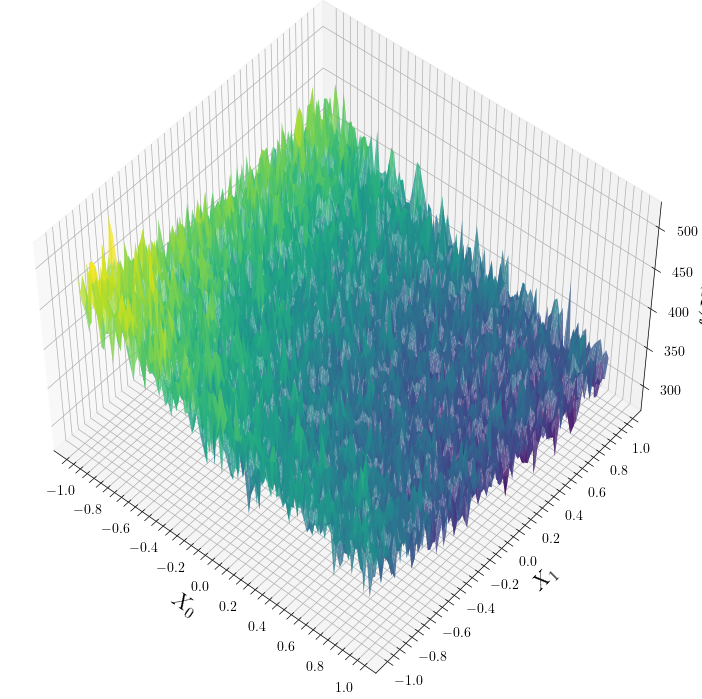

In [4]:
fig2, ax2 = function.plot(domain=design.get_bounds(),px=100)
# fig2.savefig('noiselessrosenbrock_loss.pdf', dpi=300)

In [5]:
# results = f3dasm.run_multiple_realizations(**implementation)

In [6]:
def create_implementation(optimizers) -> dict:
    return [
        {
            "optimizer": optimizer,
            "function": function,
            "sampler": sampler,
            "number_of_samples": number_of_samples,
            "iterations": iterations,
            "realizations": realizations,
            "parallelization": parallelization,
            "seed": seed,
        }
        for optimizer in optimizers
    ]

In [7]:
optimizers = []

# Random Search
optimizers.append(f3dasm.optimization.RandomSearch(data=data))

# CMAES
for population in np.linspace(6,22,6):
    optimizers.append(f3dasm.optimization.CMAES(data=data, hyperparameters={'population': int(population)}))

# PSO
for eta1, eta2 in zip(np.linspace(0.5,3.0,6),np.linspace(3.0,0.5,6)):
    optimizers.append(f3dasm.optimization.PSO(data=data, hyperparameters={'eta1': eta1, 'eta2': eta2}))
    
# Adam
for learning_rate in np.logspace(-3,-2,6):
    optimizers.append(f3dasm.optimization.Adam(data=data, hyperparameters={'learning_rate': learning_rate}))




2022-12-14 15:33:41.375291: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-12-14 15:33:41.375383: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (martin): /proc/driver/nvidia/version does not exist
2022-12-14 15:33:41.379527: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
options_list = create_implementation(optimizers)
results = []
for options in options_list:
    results.append(f3dasm.run_multiple_realizations(**options))

Optimizing for 1000 iterations with RandomSearch
Optimizing for 1000 iterations with RandomSearch
Optimizing for 1000 iterations with RandomSearch
Optimizing for 1000 iterations with RandomSearch
Optimizing for 1000 iterations with RandomSearch
Optimizing for 1000 iterations with RandomSearch
Optimizing for 1000 iterations with RandomSearch
Optimizing for 1000 iterations with RandomSearch
Optimizing for 1000 iterations with RandomSearch
Optimizing for 1000 iterations with RandomSearch


2022-12-14 15:34:23,438 - Optimized Rastrigin function (seed=49818,             dim=20, noise=0.05) with RandomSearch             optimizer for 10 realizations!


Optimizing for 1000 iterations with CMAES
Optimizing for 1000 iterations with CMAESOptimizing for 1000 iterations with CMAES

Optimizing for 1000 iterations with CMAES
Optimizing for 1000 iterations with CMAES
Optimizing for 1000 iterations with CMAES
Optimizing for 1000 iterations with CMAES
Optimizing for 1000 iterations with CMAES
Optimizing for 1000 iterations with CMAES
Optimizing for 1000 iterations with CMAES


2022-12-14 15:34:27,973 - Optimized Rastrigin function (seed=49818,             dim=20, noise=0.05) with CMAES             optimizer for 10 realizations!


Optimizing for 1000 iterations with CMAES
Optimizing for 1000 iterations with CMAES
Optimizing for 1000 iterations with CMAESOptimizing for 1000 iterations with CMAES
Optimizing for 1000 iterations with CMAES
Optimizing for 1000 iterations with CMAES

Optimizing for 1000 iterations with CMAES
Optimizing for 1000 iterations with CMAES
Optimizing for 1000 iterations with CMAES
Optimizing for 1000 iterations with CMAES


2022-12-14 15:34:31,361 - Optimized Rastrigin function (seed=49818,             dim=20, noise=0.05) with CMAES             optimizer for 10 realizations!


Optimizing for 1000 iterations with CMAES
Optimizing for 1000 iterations with CMAES
Optimizing for 1000 iterations with CMAES
Optimizing for 1000 iterations with CMAES
Optimizing for 1000 iterations with CMAES
Optimizing for 1000 iterations with CMAES
Optimizing for 1000 iterations with CMAES
Optimizing for 1000 iterations with CMAES
Optimizing for 1000 iterations with CMAES
Optimizing for 1000 iterations with CMAES


2022-12-14 15:34:34,467 - Optimized Rastrigin function (seed=49818,             dim=20, noise=0.05) with CMAES             optimizer for 10 realizations!


Optimizing for 1000 iterations with CMAES
Optimizing for 1000 iterations with CMAES
Optimizing for 1000 iterations with CMAES
Optimizing for 1000 iterations with CMAES
Optimizing for 1000 iterations with CMAES
Optimizing for 1000 iterations with CMAES
Optimizing for 1000 iterations with CMAES
Optimizing for 1000 iterations with CMAES
Optimizing for 1000 iterations with CMAES
Optimizing for 1000 iterations with CMAES


2022-12-14 15:34:37,412 - Optimized Rastrigin function (seed=49818,             dim=20, noise=0.05) with CMAES             optimizer for 10 realizations!


Optimizing for 1000 iterations with CMAES
Optimizing for 1000 iterations with CMAES
Optimizing for 1000 iterations with CMAES
Optimizing for 1000 iterations with CMAES
Optimizing for 1000 iterations with CMAES
Optimizing for 1000 iterations with CMAES
Optimizing for 1000 iterations with CMAES
Optimizing for 1000 iterations with CMAES
Optimizing for 1000 iterations with CMAES
Optimizing for 1000 iterations with CMAES


2022-12-14 15:34:40,229 - Optimized Rastrigin function (seed=49818,             dim=20, noise=0.05) with CMAES             optimizer for 10 realizations!


Optimizing for 1000 iterations with CMAES
Optimizing for 1000 iterations with CMAES
Optimizing for 1000 iterations with CMAESOptimizing for 1000 iterations with CMAES

Optimizing for 1000 iterations with CMAESOptimizing for 1000 iterations with CMAES

Optimizing for 1000 iterations with CMAES
Optimizing for 1000 iterations with CMAES
Optimizing for 1000 iterations with CMAES
Optimizing for 1000 iterations with CMAES


2022-12-14 15:34:42,962 - Optimized Rastrigin function (seed=49818,             dim=20, noise=0.05) with CMAES             optimizer for 10 realizations!


Optimizing for 1000 iterations with PSO
Optimizing for 1000 iterations with PSO
Optimizing for 1000 iterations with PSO
Optimizing for 1000 iterations with PSO
Optimizing for 1000 iterations with PSO
Optimizing for 1000 iterations with PSO
Optimizing for 1000 iterations with PSO
Optimizing for 1000 iterations with PSO
Optimizing for 1000 iterations with PSO
Optimizing for 1000 iterations with PSO


2022-12-14 15:34:45,125 - Optimized Rastrigin function (seed=49818,             dim=20, noise=0.05) with PSO             optimizer for 10 realizations!


Optimizing for 1000 iterations with PSO
Optimizing for 1000 iterations with PSO
Optimizing for 1000 iterations with PSOOptimizing for 1000 iterations with PSO

Optimizing for 1000 iterations with PSO
Optimizing for 1000 iterations with PSO
Optimizing for 1000 iterations with PSO
Optimizing for 1000 iterations with PSO
Optimizing for 1000 iterations with PSO
Optimizing for 1000 iterations with PSO


2022-12-14 15:34:47,354 - Optimized Rastrigin function (seed=49818,             dim=20, noise=0.05) with PSO             optimizer for 10 realizations!


Optimizing for 1000 iterations with PSO
Optimizing for 1000 iterations with PSOOptimizing for 1000 iterations with PSO

Optimizing for 1000 iterations with PSO
Optimizing for 1000 iterations with PSO
Optimizing for 1000 iterations with PSO
Optimizing for 1000 iterations with PSO
Optimizing for 1000 iterations with PSO
Optimizing for 1000 iterations with PSO
Optimizing for 1000 iterations with PSO


2022-12-14 15:34:49,512 - Optimized Rastrigin function (seed=49818,             dim=20, noise=0.05) with PSO             optimizer for 10 realizations!


Optimizing for 1000 iterations with PSO
Optimizing for 1000 iterations with PSO
Optimizing for 1000 iterations with PSO
Optimizing for 1000 iterations with PSO
Optimizing for 1000 iterations with PSO
Optimizing for 1000 iterations with PSO
Optimizing for 1000 iterations with PSO
Optimizing for 1000 iterations with PSO
Optimizing for 1000 iterations with PSO
Optimizing for 1000 iterations with PSO


2022-12-14 15:34:51,754 - Optimized Rastrigin function (seed=49818,             dim=20, noise=0.05) with PSO             optimizer for 10 realizations!


Optimizing for 1000 iterations with PSO
Optimizing for 1000 iterations with PSO
Optimizing for 1000 iterations with PSO
Optimizing for 1000 iterations with PSOOptimizing for 1000 iterations with PSO

Optimizing for 1000 iterations with PSO
Optimizing for 1000 iterations with PSO
Optimizing for 1000 iterations with PSO
Optimizing for 1000 iterations with PSO
Optimizing for 1000 iterations with PSO


2022-12-14 15:34:53,970 - Optimized Rastrigin function (seed=49818,             dim=20, noise=0.05) with PSO             optimizer for 10 realizations!


Optimizing for 1000 iterations with PSO
Optimizing for 1000 iterations with PSOOptimizing for 1000 iterations with PSO

Optimizing for 1000 iterations with PSO
Optimizing for 1000 iterations with PSO
Optimizing for 1000 iterations with PSO
Optimizing for 1000 iterations with PSO
Optimizing for 1000 iterations with PSO
Optimizing for 1000 iterations with PSO
Optimizing for 1000 iterations with PSO


2022-12-14 15:34:56,179 - Optimized Rastrigin function (seed=49818,             dim=20, noise=0.05) with PSO             optimizer for 10 realizations!


Optimizing for 1000 iterations with Adam
Optimizing for 1000 iterations with Adam
Optimizing for 1000 iterations with Adam
Optimizing for 1000 iterations with Adam
Optimizing for 1000 iterations with Adam
Optimizing for 1000 iterations with Adam
Optimizing for 1000 iterations with Adam
Optimizing for 1000 iterations with Adam
Optimizing for 1000 iterations with Adam
Optimizing for 1000 iterations with Adam


2022-12-14 15:35:52,874 - Optimized Rastrigin function (seed=49818,             dim=20, noise=0.05) with Adam             optimizer for 10 realizations!


Optimizing for 1000 iterations with Adam
Optimizing for 1000 iterations with Adam
Optimizing for 1000 iterations with Adam
Optimizing for 1000 iterations with Adam
Optimizing for 1000 iterations with Adam
Optimizing for 1000 iterations with Adam
Optimizing for 1000 iterations with Adam
Optimizing for 1000 iterations with Adam
Optimizing for 1000 iterations with Adam
Optimizing for 1000 iterations with Adam


2022-12-14 15:36:55,623 - Optimized Rastrigin function (seed=49818,             dim=20, noise=0.05) with Adam             optimizer for 10 realizations!


Optimizing for 1000 iterations with Adam
Optimizing for 1000 iterations with Adam
Optimizing for 1000 iterations with Adam
Optimizing for 1000 iterations with Adam
Optimizing for 1000 iterations with Adam
Optimizing for 1000 iterations with Adam
Optimizing for 1000 iterations with Adam
Optimizing for 1000 iterations with Adam
Optimizing for 1000 iterations with Adam
Optimizing for 1000 iterations with Adam


2022-12-14 15:37:52,216 - Optimized Rastrigin function (seed=49818,             dim=20, noise=0.05) with Adam             optimizer for 10 realizations!


Optimizing for 1000 iterations with Adam
Optimizing for 1000 iterations with Adam
Optimizing for 1000 iterations with Adam
Optimizing for 1000 iterations with Adam
Optimizing for 1000 iterations with Adam
Optimizing for 1000 iterations with Adam
Optimizing for 1000 iterations with Adam
Optimizing for 1000 iterations with Adam
Optimizing for 1000 iterations with Adam
Optimizing for 1000 iterations with Adam


2022-12-14 15:38:53,033 - Optimized Rastrigin function (seed=49818,             dim=20, noise=0.05) with Adam             optimizer for 10 realizations!


Optimizing for 1000 iterations with Adam
Optimizing for 1000 iterations with Adam
Optimizing for 1000 iterations with Adam
Optimizing for 1000 iterations with Adam
Optimizing for 1000 iterations with Adam
Optimizing for 1000 iterations with Adam
Optimizing for 1000 iterations with Adam
Optimizing for 1000 iterations with Adam
Optimizing for 1000 iterations with Adam
Optimizing for 1000 iterations with Adam


2022-12-14 15:39:52,033 - Optimized Rastrigin function (seed=49818,             dim=20, noise=0.05) with Adam             optimizer for 10 realizations!


Optimizing for 1000 iterations with Adam
Optimizing for 1000 iterations with Adam
Optimizing for 1000 iterations with Adam
Optimizing for 1000 iterations with Adam
Optimizing for 1000 iterations with Adam
Optimizing for 1000 iterations with Adam
Optimizing for 1000 iterations with Adam
Optimizing for 1000 iterations with Adam
Optimizing for 1000 iterations with Adam
Optimizing for 1000 iterations with Adam


2022-12-14 15:40:47,266 - Optimized Rastrigin function (seed=49818,             dim=20, noise=0.05) with Adam             optimizer for 10 realizations!


In [9]:
colordict = {'Adam': 'green',
'RandomSearch': 'blue',
'CMAES': 'orange',
'PSO': 'purple'}

In [10]:
def plot_results(results, ax):
    mean_y, _ = f3dasm.calculate_mean_std(results)
    ax.plot(mean_y, label=f"optimizer={results.optimizer}", color=colordict[results.optimizer])
    return ax

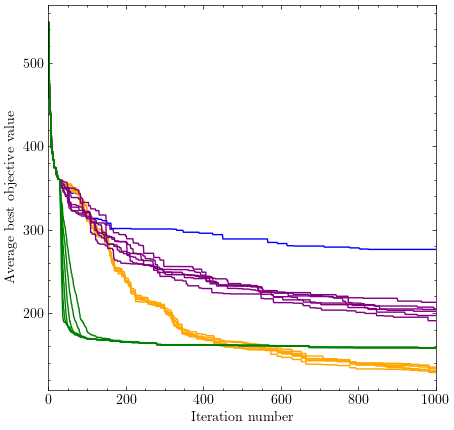

In [13]:
fig, ax = plt.figure(figsize=(5,5)), plt.axes()

ax.set_xlabel('Iteration number')
ax.set_ylabel('Average best objective value')
# ax.set_yscale('log')
# ax.set_prop_cycle(cc)
ax.set_xlim([0,1000])

for index, res in enumerate(results):
    ax = plot_results(res, ax)

#leg = ax.legend(loc='upper right', ncol=3, fancybox=True, shadow=True) #bbox_to_anchor=(0.5, 1.05)

In [12]:
fig.savefig('rosenbrockfunction_example.pdf',dpi=300)